# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [15]:
app_train['AGE'] = app_train['DAYS_BIRTH'] // 365
app_train['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

In [16]:
app_train['AGE']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int64

In [17]:
bins = np.linspace(0,100,11)
app_train['AGE'] = pd.cut(app_train['AGE'], bins)
app_train['AGE'].describe()

count           307511
unique               6
top       (30.0, 40.0]
freq             83117
Name: AGE, dtype: object

In [27]:
age_data = app_train['AGE'].value_counts(sort=False)
age_data

(0.0, 10.0]          0
(10.0, 20.0]         1
(20.0, 30.0]     52805
(30.0, 40.0]     83117
(40.0, 50.0]     74401
(50.0, 60.0]     67819
(60.0, 70.0]     29368
(70.0, 80.0]         0
(80.0, 90.0]         0
(90.0, 100.0]        0
Name: AGE, dtype: int64

D:\Users\Hsiao\anaconda3\envs\TF\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


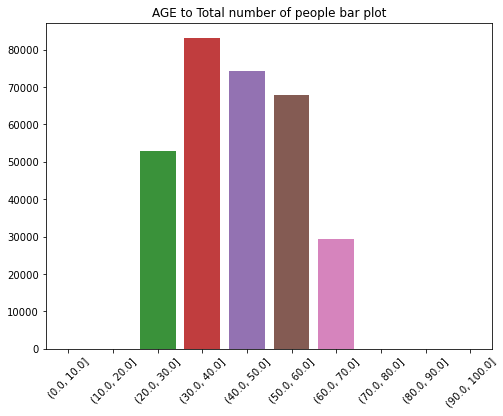

In [30]:
import seaborn as sns 

plt.figure(figsize=(8,6))
sns.barplot(age_data.index, age_data.values)
plt.title('AGE to Total number of people bar plot')
plt.xticks(rotation=45)
plt.show()

D:\Users\Hsiao\anaconda3\envs\TF\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


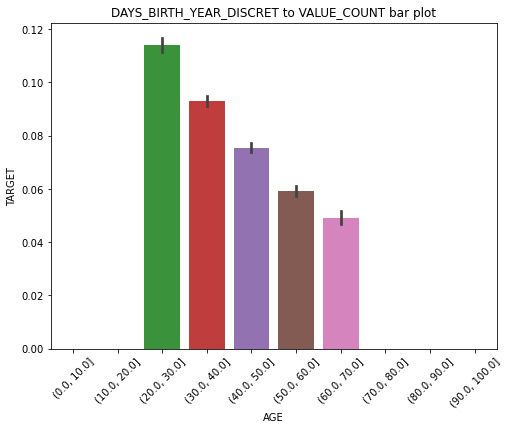

In [32]:
import seaborn as sns 

plt.figure(figsize=(8,6))
sns.barplot(app_train['AGE'], app_train['TARGET'])
plt.title('DAYS_BIRTH_YEAR_DISCRET to VALUE_COUNT bar plot')
plt.xticks(rotation=45)
plt.show()

In [8]:
app_train['equal_width_AGE'] = pd.cut(app_train['AGE'], 5)
app_train['equal_width_AGE'].value_counts(sort=False)

(19.951, 29.8]    45000
(29.8, 39.6]      82299
(39.6, 49.4]      76543
(49.4, 59.2]      68074
(59.2, 69.0]      35595
Name: equal_width_AGE, dtype: int64

In [9]:
app_train['equal_freq_AGE'] = pd.qcut(app_train['AGE'], 10)
app_train['equal_freq_AGE'].value_counts(sort=False)

(19.999, 28.0]    37330
(28.0, 32.0]      31764
(32.0, 36.0]      31763
(36.0, 39.0]      26442
(39.0, 43.0]      33597
(43.0, 47.0]      29335
(47.0, 51.0]      26782
(51.0, 56.0]      35236
(56.0, 60.0]      25894
(60.0, 69.0]      29368
Name: equal_freq_AGE, dtype: int64

In [16]:
app_train['FLAG_OWN_CAR']

0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: FLAG_OWN_CAR, Length: 307511, dtype: int32

# AMT_INCOME_TOTAL

In [31]:
app_train['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [35]:
app_train['Equal_Width_AMT_INCOME_TOTAL'] = pd.cut(app_train['AMT_INCOME_TOTAL'], 5)
app_train['Equal_Width_AMT_INCOME_TOTAL'].value_counts()

(-91324.35, 23420520.0]      307510
(93605130.0, 117000000.0]         1
(70210260.0, 93605130.0]          0
(46815390.0, 70210260.0]          0
(23420520.0, 46815390.0]          0
Name: Equal_Width_AMT_INCOME_TOTAL, dtype: int64

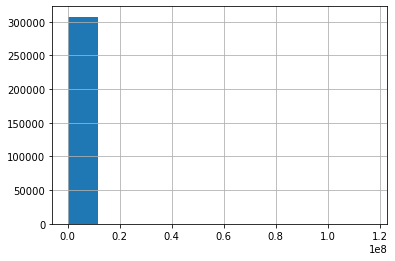

In [36]:
app_train['AMT_INCOME_TOTAL'].hist()

Text(0.5, 0, 'AMT_INCOME_TOTAL')

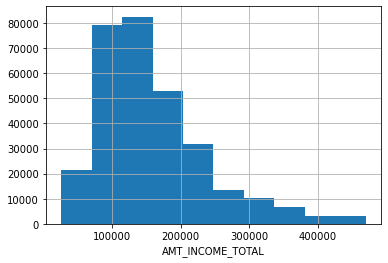

In [38]:
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')

In [40]:
app_train['NEW_AMT_INCOME_TOTAL'] = app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL']
app_train['NEW_AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: NEW_AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [43]:
app_train['Eq_WIDTH_NEW_AMT_INCOME_TOTAL'] = pd.cut(app_train['NEW_AMT_INCOME_TOTAL'], 10)
app_train['Eq_WIDTH_NEW_AMT_INCOME_TOTAL'].value_counts()

(114480.0, 158895.0]    82452
(70065.0, 114480.0]     79194
(158895.0, 203310.0]    52899
(203310.0, 247725.0]    31736
(25205.85, 70065.0]     21435
(247725.0, 292140.0]    13487
(292140.0, 336555.0]    10480
(336555.0, 380970.0]     6570
(425385.0, 469800.0]     3158
(380970.0, 425385.0]     3006
Name: Eq_WIDTH_NEW_AMT_INCOME_TOTAL, dtype: int64